Modelo  de remoção de ruído de imagens

In [2]:
#Importação das bibliotecas necessárias
import pandas as pd
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.datasets import mnist

In [3]:
(x_treinamento,_),(x_teste, _) = mnist.load_data()

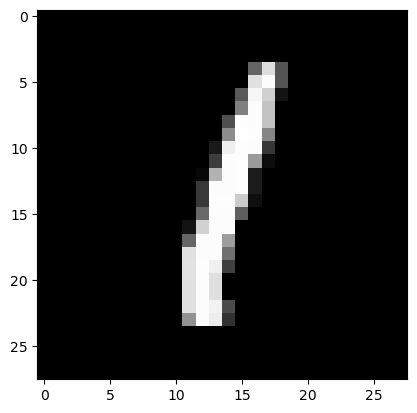

In [6]:
#Visualisação de imagem de teste
img = x_treinamento[290]
plt.imshow(img, cmap = 'gray')
plt.show()


Início no tratamento dos dados

In [9]:
#normalização
x_treinamento = x_treinamento.astype("float32") / 255.0
x_teste = x_teste.astype("float32") / 255.0

In [11]:
#Transformação de matriz para vetor
x_treinamento = x_treinamento.reshape(len(x_treinamento), np.prod(x_treinamento.shape[1:]))
x_teste = x_teste.reshape(len(x_teste), np.prod(x_teste.shape[1:]))

Inserção de Ruídos com dados aleatórios do numpy

In [14]:
x_treinamento_ruido = x_treinamento + 0.7 * np.random.normal(loc =0.0, scale = 1.0, size = x_treinamento.shape)
x_teste_ruido = x_teste + 0.7 * np.random.normal(loc = 0.0, scale = 1.0, size = x_teste.shape)

In [19]:
x_treinamento_ruido = np.clip(x_treinamento_ruido,0.0,1.0)
x_teste_ruido = np.clip(x_teste_ruido, 0.0, 1.0)

Treinamento do Modelo de AutoEncoder

In [26]:
inputs = Input(shape=(784,))
encoder = Dense(200, activation = 'relu')(inputs)
decoder = Dense(784, activation = 'sigmoid')(encoder)
modelo = Model(inputs, decoder)
modelo.compile(optimizer = 'adam', loss = 'binary_crossentropy')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 2, patience = 40)
modelo.fit(x_treinamento_ruido, x_treinamento, batch_size = 128, shuffle = True, epochs = 500, 
                      callbacks = [es], validation_data=(x_teste_ruido, x_teste))

Epoch 1/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2644 - val_loss: 0.1585
Epoch 2/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1551 - val_loss: 0.1438
Epoch 3/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1433 - val_loss: 0.1387
Epoch 4/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1380 - val_loss: 0.1364
Epoch 5/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1351 - val_loss: 0.1344
Epoch 6/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1333 - val_loss: 0.1329
Epoch 7/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1316 - val_loss: 0.1321
Epoch 8/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1304 - val_loss: 0.1312
Epoch 9/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1292 - val_loss: 0.1305
Epoch 10/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1284 - val_loss: 0.1301
Epoch 11/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1274 - val_loss: 0.1298
Epoch 12/500
469/469 ━━━━━━━━━━━━━━━━━━━━

Inserção de ruídos em dados selecionados aleatoriamente para posterior remoção como o modelo de autoencoder

In [45]:
idx = np.random.randint(x_teste.shape[0])
original_image = x_teste[idx]
noisy_image = original_image + 0.7 * np.random.normal(loc = 0.0, scale = 1.0, size = original_image.shape)
noisy_image = np.clip(noisy_image, 0.0, 1.0)
new_image = modelo.predict(np.expand_dims(noisy_image, axis = 0))
denoised_image = new_image.reshape((28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Gráfico com dados originais, com ruído e com ruído removido pelo autoencoder

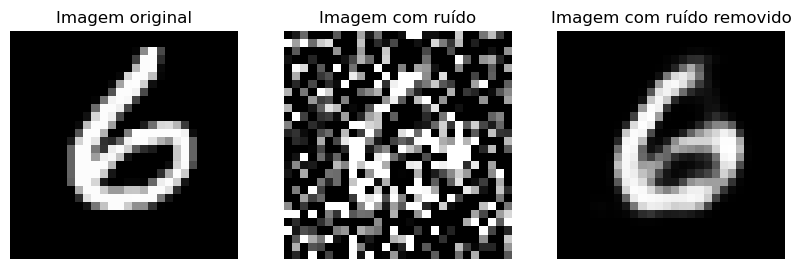

In [47]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(original_image.reshape((28,28)), cmap = 'gray')
plt.title("Imagem original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape((28,28)), cmap = 'gray')
plt.title("Imagem com ruído")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(denoised_image, cmap = 'gray')
plt.title("Imagem com ruído removido")
plt.axis("off")
plt.show()
